In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from array import *

In [2]:
# reading and shuffling the data

df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1]
y = myData.iloc[:, -1:]

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_y, test_y = X[:splitData], X[splitData:], y[:splitData], y[splitData:]

iter_value = 200
iter_value += 1
skip_num=10
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((10, 10, 10))
error_array = np.zeros((10, iter_scaled))

In [5]:
def randomiseMatrix(deg):
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()              # assigning random values for weights
    return A            

In [6]:
def stocasticGD(deg, X, y, learning_rate, iterations):
    
    A = randomiseMatrix(deg)
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):                 # for each row in input data
            row = X.iloc[z]                           # contains strength, temperature
            column = y.iloc[z]                    # contains pressure
            
            dotP_wx = 0                              # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row[0]**m) * (row[1]**n)                                                     # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                                                                                                                  # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) 
                
             # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):           # power of x2
                    A[m][n] -= (learning_rate/len(X)) * dotP_wx * (row[0]**m) * (row[1]**n)       # calculating w0,w1,w2,... for each iteration
                    
            sumItrError +=  (dotP_wx**2)*0.5  
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError
        
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
            for m in range(deg+1):                 
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = A[m][n]
    return sumItrError

Error of last iteration of degree  0  :   66.521680596668

Error values after each 10 complete iterations : 
[83.8491664895325, 66.52520831025133, 66.52169921697696, 66.52168072176273, 66.52168059750997, 66.52168059667362, 66.52168059666798, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668, 66.521680596668]


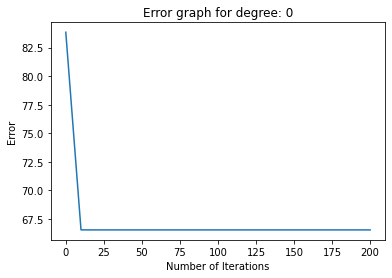

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  1  :   21.767584508459557

Error values after each 10 complete iterations : 
[130.4597646433487, 60.8056212684544, 52.283841739967045, 47.300328309387915, 43.878982789572504, 41.20314340371163, 38.93082842896971, 36.91465885119421, 35.08736071780581, 33.41493401044922, 31.87747567705627, 30.46130584026654, 29.155715395781684, 27.951604476361712, 26.84089589211308, 25.816267444717287, 24.87101661516187, 23.99898128750761, 23.194485186437287, 22.452295103398885, 21.767584508459557]


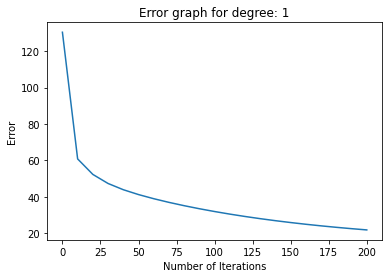

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  2  :   24.215097832081334

Error values after each 10 complete iterations : 
[1934.4252701184216, 178.71276219487072, 75.56153324122214, 55.37725432565228, 48.85016712723458, 44.95022394764554, 41.86353449980162, 39.24297383452444, 36.98259517173569, 35.022538634359975, 33.31694270836905, 31.82781238879219, 30.523159863683908, 29.375962439234595, 28.363368157557034, 27.46603993208029, 26.667605100470503, 25.95419193570793, 25.314039100252877, 24.73716649633798, 24.215097832081334]


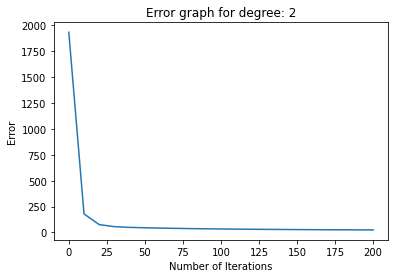

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  3  :   22.351300685344736

Error values after each 10 complete iterations : 
[411.4007320049641, 167.4844776047832, 132.25656214111066, 106.05656623378819, 86.19152523703934, 71.09276388010984, 59.60245727212499, 50.84587172472305, 44.16085398545956, 39.04607062823482, 35.12191803545961, 32.100938208032815, 29.765426681067623, 27.950484194516157, 26.531188546850732, 25.412884788369915, 24.52383551440486, 23.809657407875427, 23.229109732286812, 22.750906089591076, 22.351300685344736]


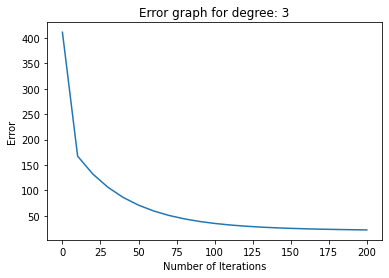

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  4  :   31.77008363808748

Error values after each 10 complete iterations : 
[3093.6619880983076, 55.45316789219195, 49.430600967073175, 46.86101648763873, 44.88956799001289, 43.28696255279278, 41.94397760331724, 40.78728947400618, 39.76673883680202, 38.84783074938443, 38.006690689497646, 37.22666185324905, 36.4960081105556, 35.806360872247545, 35.15166671569456, 34.52747249927653, 33.93043828826113, 33.358004347482186, 32.808162557709885, 32.27929878973252, 31.77008363808748]


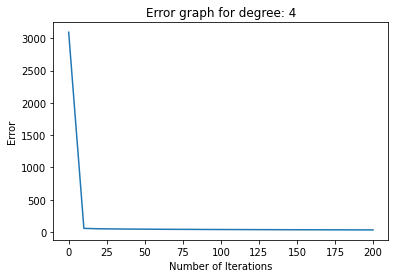

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  5  :   18.795715248928495

Error values after each 10 complete iterations : 
[409.76636571655075, 73.19835934866522, 52.42847942654607, 41.26134080386798, 34.331554656828075, 29.93544604106419, 27.077562225109414, 25.162632268881126, 23.832466817301384, 22.87004504860853, 22.14282886819377, 21.569135361014144, 21.09809943852929, 20.697672684328072, 20.347392774161378, 20.03399781918565, 19.748746235836002, 19.48576525390481, 19.241024054412616, 19.011689096407054, 18.795715248928495]


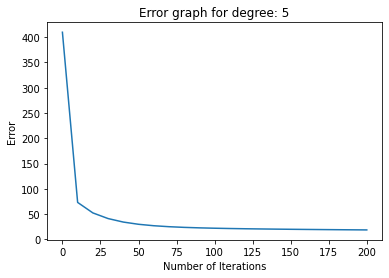

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  6  :   18.033787440737736

Error values after each 10 complete iterations : 
[491.83478453599326, 39.7834919029551, 32.6204468177948, 28.949381386093254, 26.736772776878993, 25.2863688996372, 24.24594678258533, 23.434980136535394, 22.75988785086778, 22.17136074251107, 21.642794956746332, 21.159339806783475, 20.712302625806885, 20.296269465003718, 19.907610208129285, 19.543694055981614, 19.20247237447434, 18.882253276324413, 18.581577347647148, 18.299147393092497, 18.033787440737736]


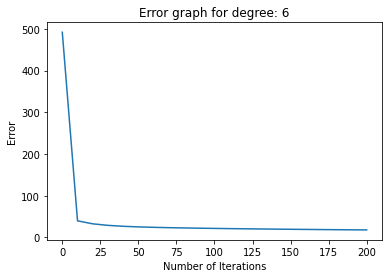

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  7  :   21.233695464205525

Error values after each 10 complete iterations : 
[129.21542469145663, 42.09308141353445, 33.66205268952515, 29.54568663357852, 27.378087172572354, 26.133085276265767, 25.3382641679622, 24.771715170293092, 24.326864080066443, 23.951253060154798, 23.61833448771376, 23.31422900923037, 23.031385277158243, 22.765483033169787, 22.51389044003956, 22.274881006113155, 22.04722887950595, 21.829996019419262, 21.62241827876695, 21.423843235418072, 21.233695464205525]


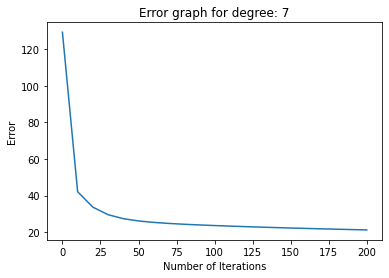

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  8  :   23.050796380301488

Error values after each 10 complete iterations : 
[2324.12995091723, 152.85360483563196, 97.8897105068535, 69.9690424591833, 55.24632840509326, 47.018814021891934, 42.03260089142337, 38.70313190497903, 36.25488803743664, 34.304998191894356, 32.6615254586653, 31.225670767758427, 29.94431568454538, 28.786964470908554, 27.734518753016573, 26.77379392018877, 25.89482393669714, 25.089522049178232, 24.351002257291018, 23.6732240466755, 23.050796380301488]


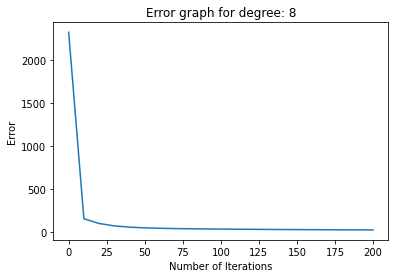

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error of last iteration of degree  9  :   17.23501391504598

Error values after each 10 complete iterations : 
[5223.902155824045, 57.960539023729865, 37.43928955735365, 28.726243587661415, 24.705642991103794, 22.690995388973892, 21.553887218800455, 20.815682914311584, 20.271080025353815, 19.830491824226428, 19.453621016305412, 19.121332219359235, 18.823695633393854, 18.554884271661983, 18.31098374442553, 18.089042658839443, 17.886652858192114, 17.70175687362231, 17.532553564883408, 17.377446848755934, 17.23501391504598]


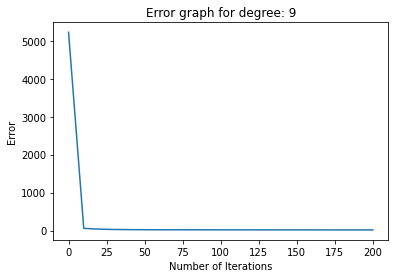

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Degree  9  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1
x_axis=[]

for i in range(iter_scaled):
    x_axis.append(i*skip_num)
    
for i in range(10):
    SGD_Error = stocasticGD(i, train_X, train_y, 0.5, iter_value)
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
    
    error_list = error_array[i].tolist()
    print("\nError values after each 10 complete iterations : ")
    print(error_list)
    
    plt.plot(x_axis, error_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    error_list=error_array[i].tolist()
    
print("Degree ", minErrorDeg, " gives minimum error.")      


In [8]:
def Predict_SGD(deg, X, y, iterations):
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):             # for each row in input data
            row = X.iloc[z]                       # contains strength, temperature
            column = y.iloc[z]                 # contains pressure
            
            dotP_wx = 0                          # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += coeff_list[deg][m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx = column[0] - dotP_wx                   # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn
            sumItrError +=  (dotP_wx**2)*0.5  
            
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
    return sumItrError

In [9]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(10):
    SGD_Error = Predict_SGD(i, test_X, test_y, iter_value)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("Degree ", minErrorDeg, " gives minimum testing error. \nMinimum testing error = ", minError) 

Testing errors for various degrees are as follows:
Error of last iteration of degree  0  :   29.762779053671974
Error of last iteration of degree  1  :   9.628211039327816
Error of last iteration of degree  2  :   10.375361323720133
Error of last iteration of degree  3  :   9.833438775988084
Error of last iteration of degree  4  :   14.070566495955553
Error of last iteration of degree  5  :   8.079671106575905
Error of last iteration of degree  6  :   7.958366697072404
Error of last iteration of degree  7  :   8.999622954542426
Error of last iteration of degree  8  :   10.276621086169813
Error of last iteration of degree  9  :   7.2102852946985
Degree  9  gives minimum testing error. 
Minimum testing error =  7.2102852946985
